<br/>

## Tarea 2 - Introducción a la minería de datos y los modelos predictivos
### Alumno - Sebastián Ituarte
<span style="color:green"><b>Minería de datos empresariales</b></span>

---



In [ ]:
!pip install validclust

In [ ]:
# Importamos librerías necesarias para la tarea

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import (
    davies_bouldin_score,
    pairwise_distances,
    silhouette_samples,
    silhouette_score,
)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from validclust import dunn

## Actividad 1

In [ ]:
# Importamos datos necesarios a DataFrame
df = pd.read_csv("mkt_data.csv")

In [ ]:
# Imprimimos características
print("Características del Dataframe")
num_filas, num_columnas = df.shape
print(df.shape)

# Cantidad de registros filas
print("Cantidad de filas")
print(num_filas)

# Cantidad de características columnas
print("Cantidad de columnas")
print(num_columnas)

# Imprimimos los nombres de las columnas
print("\n")
print("Nombre de sus columnas")
print(df.columns)

Características del Dataframe
(2215, 24)
Cantidad de filas
2215
Cantidad de columnas
24


Nombre de sus columnas
Index(['Unnamed: 0', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Spent', 'Children',
       'Family_Size', 'Is_Parent', 'Living_With_Alone', 'Living_With_Partner'],
      dtype='object')


In [ ]:
# Imprimimos una muestra de los datos
df.sample(5)

,Unnamed: 0,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
293,293,1,23976.0,1,0,68,14,1,21,2,...,1,3,7,37,66,1,3,1,0,1
391,391,2,55521.0,1,2,11,416,0,26,0,...,3,6,7,66,446,3,4,1,1,0
174,174,1,25271.0,1,0,45,10,1,18,10,...,1,2,9,38,50,1,3,1,0,1
1933,1933,2,51141.0,0,0,96,144,0,7,0,...,1,4,5,81,157,0,1,0,1,0
934,934,1,68274.0,1,1,83,135,25,51,23,...,2,5,3,42,305,2,3,1,1,0


In [ ]:
# Describmos el DataFrame
df.describe()

,Unnamed: 0,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,1107.002709,1.267269,51969.861400,0.441535,0.505643,49.024379,305.225282,26.361625,167.063205,37.651016,...,2.671783,5.802257,5.318736,52.183296,607.321445,0.947178,2.592325,0.714221,0.354853,0.645147
std,639.564427,0.652207,21526.320095,0.536886,0.544198,28.949608,337.345380,39.802036,224.311559,54.760822,...,2.927179,3.250974,2.425863,11.987000,602.925291,0.749230,0.905885,0.451887,0.478577,0.478577
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,553.500000,1.000000,35284.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,44.000000,69.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1107.000000,1.000000,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,51.000000,397.000000,1.000000,3.000000,1.000000,0.000000,1.000000
75%,1660.500000,2.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.500000,50.000000,...,4.000000,8.000000,7.000000,62.000000,1048.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,2215.000000,2.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,128.000000,2525.000000,3.000000,5.000000,1.000000,1.000000,1.000000


### Analizamos el Dataframe antes de realizar la limpieza de datos

In [ ]:
# Estudiamos el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2215 non-null   int64  
 1   Education            2215 non-null   int64  
 2   Income               2215 non-null   float64
 3   Kidhome              2215 non-null   int64  
 4   Teenhome             2215 non-null   int64  
 5   Recency              2215 non-null   int64  
 6   Wines                2215 non-null   int64  
 7   Fruits               2215 non-null   int64  
 8   Meat                 2215 non-null   int64  
 9   Fish                 2215 non-null   int64  
 10  Sweets               2215 non-null   int64  
 11  Gold                 2215 non-null   int64  
 12  NumDealsPurchases    2215 non-null   int64  
 13  NumWebPurchases      2215 non-null   int64  
 14  NumCatalogPurchases  2215 non-null   int64  
 15  NumStorePurchases    2215 non-null   i

In [ ]:
# Revisamos los valores nulos
df.isnull().sum().sum()

0

In [ ]:
# Calcular y contar outliers
for column in df.select_dtypes(include=["int64", "float64"]).columns:
    Q1 = np.quantile(df[column], 0.25)
    Q3 = np.quantile(df[column], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if len(outliers) / len(df) < 0.05:
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"{column} tiene {len(outliers)} outliers.")

Unnamed: 0 tiene 0 outliers.
Education tiene 0 outliers.
Income tiene 7 outliers.
Kidhome tiene 0 outliers.
Teenhome tiene 0 outliers.
Recency tiene 0 outliers.
Wines tiene 34 outliers.
Fruits tiene 242 outliers.
Meat tiene 189 outliers.
Fish tiene 221 outliers.
Sweets tiene 243 outliers.
Gold tiene 197 outliers.
NumDealsPurchases tiene 82 outliers.
NumWebPurchases tiene 3 outliers.
NumCatalogPurchases tiene 17 outliers.
NumStorePurchases tiene 0 outliers.
NumWebVisitsMonth tiene 5 outliers.
Age tiene 3 outliers.
Spent tiene 2 outliers.
Children tiene 37 outliers.
Family_Size tiene 0 outliers.
Is_Parent tiene 0 outliers.
Living_With_Alone tiene 0 outliers.
Living_With_Partner tiene 0 outliers.


In [ ]:
# Eliminando la columna 'Unnamed: 0' no tiene relevancia para el análisis
df = df.drop(columns=["Unnamed: 0"])

# Verificar si hay valores ausentes
if df.isnull().sum().sum() == 0:
    print("No hay valores ausentes.")
else:
    # Eliminar filas con valores ausentes
    df.dropna(inplace=True)

# DataFrame para el informe
reporte_df = pd.DataFrame(columns=["Variable", "Outliers"])

# Limpiar outliers y comparar con resultado anterior a la limpieza
for column in df.select_dtypes(include=["int64", "float64"]).columns:
    Q1 = np.quantile(df[column], 0.25)
    Q3 = np.quantile(df[column], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if len(outliers) / len(df) < 0.05:
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Añadir al DataFrame de informe
    reporte_df = reporte_df._append(
        {"Variable": column, "Outliers": len(outliers)}, ignore_index=True
    )

print("\n")
print("Limpieza completada")

No hay valores ausentes.


Limpieza completada


In [ ]:
# Informe detallado de valores ausentes y outliers
reporte_df

,Variable,Outliers
0,Education,0
1,Income,0
2,Kidhome,0
3,Teenhome,0
4,Recency,0
5,Wines,9
6,Fruits,227
7,Meat,170
8,Fish,205
9,Sweets,210


In [ ]:
# Describmos el DataFrame luego de la limpieza
df.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
count,2016.00000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,...,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,1.25000,51077.098710,0.415675,0.477679,48.980655,283.288690,26.642361,160.922619,38.352183,27.230159,...,2.545635,5.803075,5.264385,51.774802,579.000496,0.893353,2.538194,0.711806,0.355159,0.644841
std,0.65633,20524.925933,0.509787,0.526704,28.980341,308.467942,39.762403,213.814669,55.497810,41.049200,...,2.655562,3.253463,2.284926,11.702977,579.829673,0.677197,0.845088,0.453034,0.478680,0.478680
min,0.00000,5305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,25.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.00000,34482.500000,0.000000,0.000000,24.000000,22.000000,2.000000,15.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,43.000000,67.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.00000,50343.500000,0.000000,0.000000,49.000000,163.000000,8.000000,63.500000,12.000000,8.000000,...,2.000000,5.000000,6.000000,51.000000,352.000000,1.000000,3.000000,1.000000,0.000000,1.000000
75%,2.00000,67689.000000,1.000000,1.000000,74.000000,483.000000,33.000000,223.000000,51.000000,35.000000,...,4.000000,8.000000,7.000000,61.000000,1008.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,2.00000,105471.000000,2.000000,2.000000,99.000000,1193.000000,197.000000,984.000000,259.000000,198.000000,...,10.000000,13.000000,13.000000,81.000000,2352.000000,2.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
# Estudiamos el DataFrame luego de la limpieza
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2016 entries, 0 to 2214
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2016 non-null   int64  
 1   Income               2016 non-null   float64
 2   Kidhome              2016 non-null   int64  
 3   Teenhome             2016 non-null   int64  
 4   Recency              2016 non-null   int64  
 5   Wines                2016 non-null   int64  
 6   Fruits               2016 non-null   int64  
 7   Meat                 2016 non-null   int64  
 8   Fish                 2016 non-null   int64  
 9   Sweets               2016 non-null   int64  
 10  Gold                 2016 non-null   int64  
 11  NumDealsPurchases    2016 non-null   int64  
 12  NumWebPurchases      2016 non-null   int64  
 13  NumCatalogPurchases  2016 non-null   int64  
 14  NumStorePurchases    2016 non-null   int64  
 15  NumWebVisitsMonth    2016 non-null   int64 

## Actividad 2

### Graficamos las variables seleccionadas

In [ ]:
# Crear el diccionario de mapeo
education_mapping = {0: "Undergraduate", 1: "Graduate", 2: "Postgraduate"}

# Obtenemos los tipos de Educación
education_values = sorted(df["Education"].unique())
# Resultado: [0, 1, 2]

# Mapear los valores únicos a sus correspondientes valores de texto
mapped_education_values = [education_mapping[val] for val in education_values]

mapped_education_values

['Undergraduate', 'Graduate', 'Postgraduate']

In [ ]:
# Seleccionar las cinco variables relevantes
variables = ["Income", "Age", "Wines", "NumWebPurchases", "NumStorePurchases"]

### Analizamos las variables previo a crear los gráficos

In [ ]:
def estadistica(data, var):
    q1 = np.percentile(data[var], 25)
    q3 = np.percentile(data[var], 75)
    iqr = q3 - q1

    data_estadistica = {
        "media": np.mean(data[var]),
        "desviacion_std": np.std(data[var], ddof=1),
        "mediana": np.median(data[var]),
        "varianza": np.var(data[var], ddof=1),
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
    }

    print(f"Datos estadisticos para variable - {var}")
    print(data_estadistica)


# Analizamos las variables previo a crear los gráficos
for variable in variables:
    estadistica(df, variable)
    print("\n")

Datos estadisticos para variable - Income
{'media': 51077.09871031746, 'desviacion_std': 20524.925932912443, 'mediana': 50343.5, 'varianza': 421272584.5515418, 'q1': 34482.5, 'q3': 67689.0, 'iqr': 33206.5}


Datos estadisticos para variable - Age
{'media': 51.77480158730159, 'desviacion_std': 11.702977499027623, 'mediana': 51.0, 'varianza': 136.95968234274685, 'q1': 43.0, 'q3': 61.0, 'iqr': 18.0}


Datos estadisticos para variable - Wines
{'media': 283.2886904761905, 'desviacion_std': 308.4679423459717, 'mediana': 163.0, 'varianza': 95152.47145515775, 'q1': 22.0, 'q3': 483.0, 'iqr': 461.0}


Datos estadisticos para variable - NumWebPurchases
{'media': 4.000992063492063, 'desviacion_std': 2.5814761022403867, 'mediana': 3.0, 'varianza': 6.66401886643822, 'q1': 2.0, 'q3': 6.0, 'iqr': 4.0}


Datos estadisticos para variable - NumStorePurchases
{'media': 5.803075396825397, 'desviacion_std': 3.2534632002383326, 'mediana': 5.0, 'varianza': 10.585022795305052, 'q1': 3.0, 'q3': 8.0, 'iqr': 5.0}

### Graficamos las variables seleccionadas por tipo de Educación

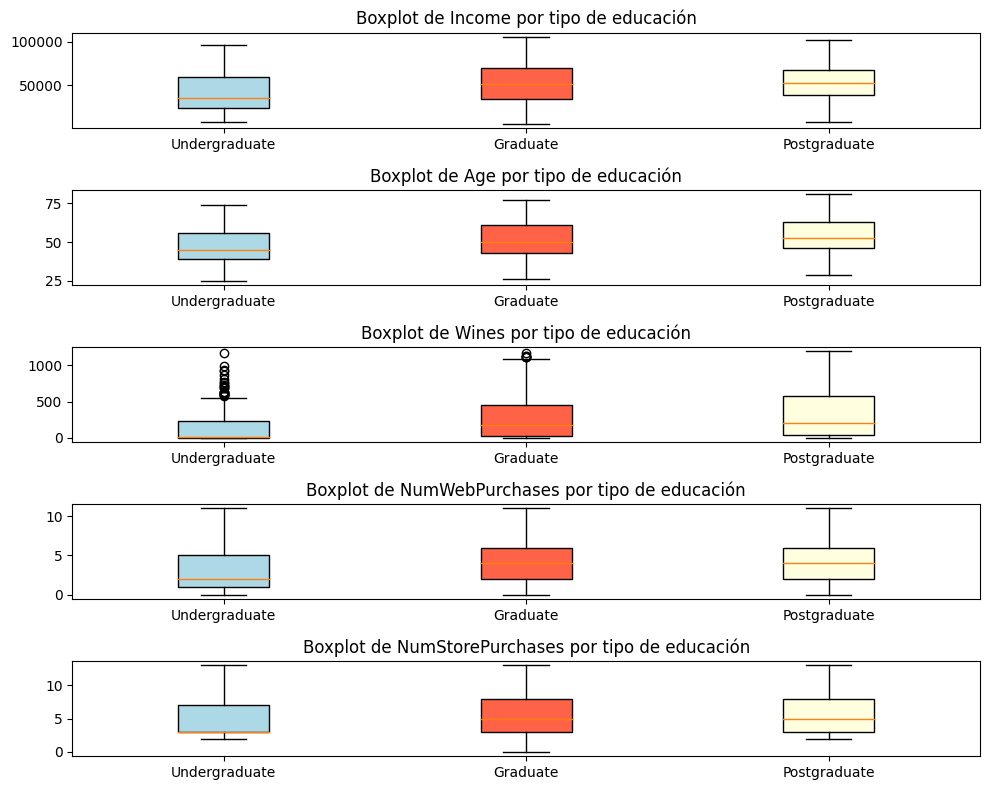

In [ ]:
# Crear gráficos de caja y bigotes para cada variable, separados por educacion
fig, axs = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 8))

# Colores para los gráficos de caja
box_colors = ["lightblue", "tomato", "lightyellow"]

for i, var in enumerate(variables):
    data_to_plot = [
        df[df["Education"] == education_values][var]
        for education_values in education_values
    ]
    bplot = axs[i].boxplot(data_to_plot, patch_artist=True)
    axs[i].set_title(f"Boxplot de {var} por tipo de educación")
    axs[i].set_xticklabels(mapped_education_values)

    # Colorear cada caja
    for patch, color in zip(bplot["boxes"], box_colors):
        patch.set_facecolor(color)

plt.tight_layout()
plt.show()

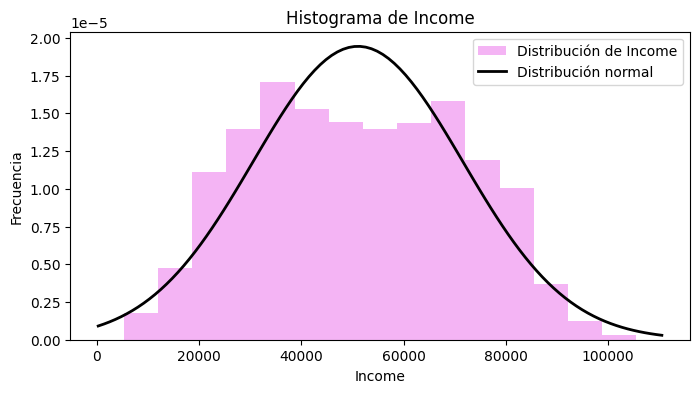

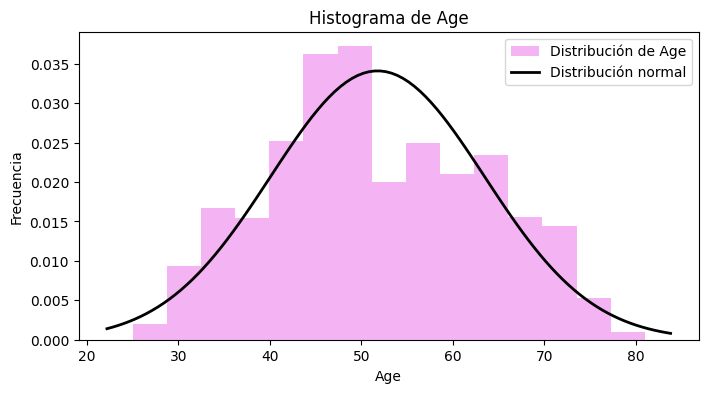

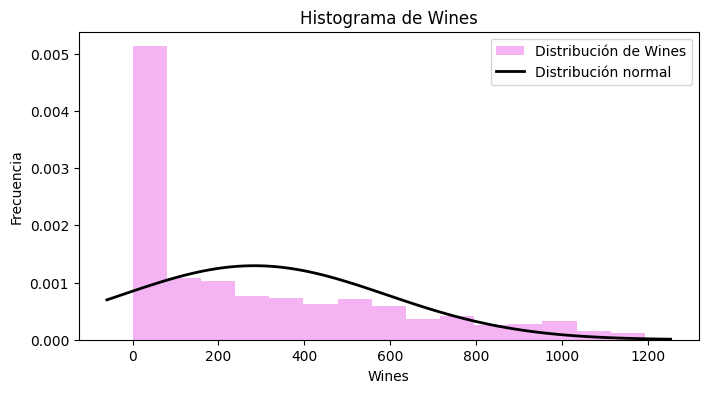

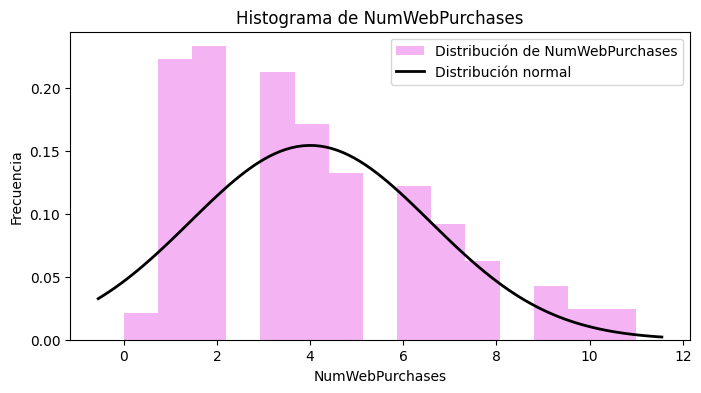

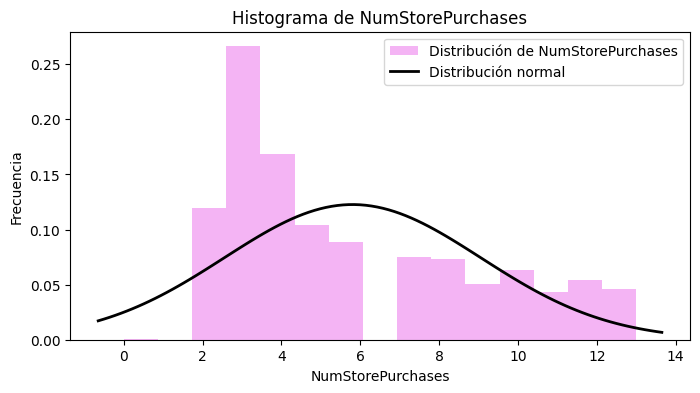

In [ ]:
# Crear el histograma
for variable in variables:
    plt.figure(figsize=(8, 4))
    n, bins, patches = plt.hist(
        df[variable],
        bins=15,
        density=True,
        alpha=0.6,
        color="violet",
        label=f"Distribución de {variable}",
    )

    # Añadir curva normal
    media = np.mean(df[variable])
    desviacion_std = np.std(df[variable], ddof=0)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = sc.stats.norm.pdf(x, media, desviacion_std)
    plt.plot(x, p, "k", linewidth=2, label="Distribución normal")

    # Generar grafico
    plt.title(f"Histograma de {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

#### Analisis de variables:

**Variable - [Income]**
- La forma del histograma es aproximadamente simétrica y tiene una apariencia similar a una campana, lo que sugiere que los datos de ingresos pueden seguir una distribución normal.

**Datos estadísticos:**
- media: 51012.74129353234
- desviacion_std: 20510.205761256406
- mediana: 50286.0
- varianza: 420668540.3690754
- q1: 34451.0
- q3: 67536.0
- iqr: 33085.0

**Conclusión**
- El histograma y los datos estadísticos indican que la distribución de ingresos en la muestra es aproximadamente normal, con una media y mediana muy cercanas, lo que sugiere simetría. La desviación estándar y el rango intercuartílico muestran que hay una dispersión moderada en los ingresos. La similitud entre la distribución de los datos y la distribución normal implica que los ingresos se distribuyen de manera uniforme alrededor de la media, con la mayoría de los individuos teniendo ingresos en el rango medio, y menos individuos en los extremos bajos y altos.

---

**Variable - [Age]**
- La forma del histograma es aproximadamente simétrica y sigue una curva de campana, lo que sugiere que las edades pueden estar distribuidas normalmente.

**Datos estadísticos:**
- media: 51.77313432835821
- desviacion_std: 11.6880080310574
- mediana: 51.0
- varianza: 136.6095317340623
- q1: 43.0
- q3: 61.0
- iqr: 18.0

**Conclusión**
- El histograma y los datos estadísticos indican que la distribución de las edades en la muestra es aproximadamente normal, con una media y mediana muy cercanas, lo que sugiere simetría. La desviación estándar y el rango intercuartílico muestran una variabilidad moderada en las edades. La similitud entre la distribución de los datos y la distribución normal implica que las edades se distribuyen de manera uniforme alrededor de la media, con la mayoría de los individuos en el rango medio de edades, y menos individuos en los extremos jóvenes y mayores.

---

**Variable - [Wines]**
- El pico más alto en el histograma se encuentra en el valor cero, indicando que una gran cantidad de individuos no consumen vino en absoluto. La distribución tiene una cola larga hacia la derecha, lo que sugiere que la mayoría de los individuos consumen cantidades bajas de vino, pero hay algunos que consumen cantidades significativamente mayores.

**Datos estadísticos:**
- media: 280.6
- desviacion_std: 304.96954649717446
- mediana: 162.0
- varianza: 93006.42429069226
- q1: 22.0
- q3: 482.0
- iqr: 460.0

**Conclusión**
- El histograma, junto con los datos estadísticos, revela que el consumo de vino entre los individuos tiene una distribución altamente sesgada con muchos individuos que no consumen vino y unos pocos que consumen grandes cantidades. Esta información es crucial para entender los patrones de consumo y puede ayudar a dirigir campañas o estrategias de marketing hacia diferentes segmentos de la población con distintos niveles de consumo de vino.

---

**Variable - [NumWebPurchases]**
- La forma del histograma es asimétrica, con un sesgo hacia la derecha. La mayor frecuencia de valores se encuentra en los números bajos de compras, y la frecuencia disminuye a medida que aumenta el número de compras.


**Datos estadísticos:**
- media:3.99502487562189056
- desviacion_std:2.58166277856309376
- mediana:3.00
- varianza:6.6649827022181126
- q1:2.00
- q3:6.00
- iqr:4.00

**Conclusión**
- El histograma y los datos estadísticos indican que la distribución del número de compras por internet es asimétrica y sesgada a la derecha. La mayoría de los individuos realiza un número bajo de compras por internet, con pocos individuos realizando un número alto de compras.

---

**Variable - [NumStorePurchases]**
- La forma del histograma es asimétrica, con un sesgo hacia la derecha.Esto indica que la mayoría de los individuos realiza pocas compras en tiendas físicas, y la frecuencia disminuye a medida que aumenta el número de compras.


**Datos estadísticos:**
- media:5.7900497512437815
- desviacion_std:3.24489114824741567
- mediana:5.00
- varianza:10.5293185639744322
- q1:3.00
- q3:8.00
- iqr:5.00

**Conclusión**
- El histograma y los datos estadísticos indican que la distribución del número de compras en tiendas físicas es asimétrica y sesgada a la derecha. La mayoría de los individuos realiza un número bajo de compras en tiendas, con pocos individuos realizando un número alto de compras. La media y la mediana reflejan esta distribución, y la variabilidad moderada indica que aunque hay una concentración en valores bajos, hay una dispersión notable en los datos.


### Estandarización y normalización de las variables

In [ ]:
# Escalamiento
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df[variables]), columns=variables)

df_scaled

,Income,Age,Wines,NumWebPurchases,NumStorePurchases
0,0.527454,0.696429,0.532272,0.727273,0.307692
1,0.409710,0.750000,0.009220,0.090909,0.153846
2,0.661981,0.553571,0.357083,0.727273,0.769231
3,0.213056,0.214286,0.009220,0.181818,0.307692
4,0.529002,0.267857,0.145013,0.454545,0.461538
...,...,...,...,...,...
2011,0.290677,0.392857,0.002515,0.090909,0.153846
2012,0.558253,0.517857,0.594300,0.818182,0.307692
2013,0.515904,0.267857,0.761106,0.181818,1.000000
2014,0.638340,0.714286,0.358759,0.545455,0.769231


In [ ]:
# Estandarización
df_standardized = pd.DataFrame(
    StandardScaler().fit_transform(df[variables]), columns=variables
)

df_standardized

,Income,Age,Wines,NumWebPurchases,NumStorePurchases
0,0.344101,1.044882,1.140470,1.549501,-0.554339
1,-0.230660,1.301291,-0.882932,-1.162799,-1.169221
2,1.000783,0.361126,0.462760,1.549501,1.290307
3,-1.190609,-1.262796,-0.882932,-0.775327,-0.554339
4,0.351655,-1.006387,-0.357626,0.387087,0.060543
...,...,...,...,...,...
2011,-0.811707,-0.408100,-0.908873,-1.162799,-1.169221
2012,0.494444,0.190187,1.380425,1.936973,-0.554339
2013,0.287717,-1.006387,2.025709,-0.775327,2.212630
2014,0.885382,1.130352,0.469246,0.774558,1.290307


## Actividad 3

### Método del Codo

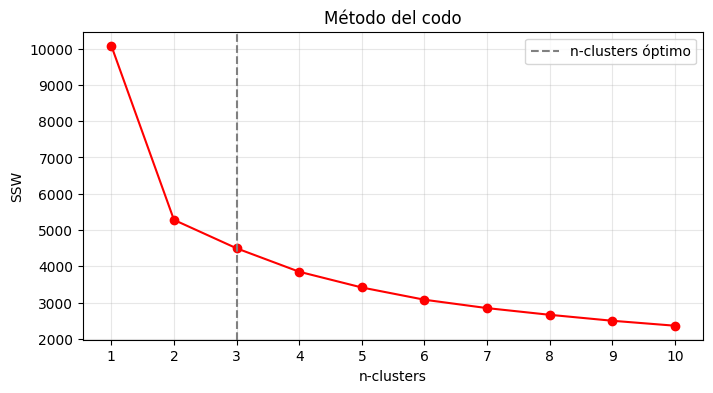

In [ ]:
n_max_cluster = 10
ssw = []

for i in np.arange(1, n_max_cluster + 1):
    km_model_tmp = KMeans(n_clusters=i, init="random", n_init=n_max_cluster)
    km_model_tmp.fit(df_standardized)
    ssw.append(km_model_tmp.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, n_max_cluster + 1), ssw, "o-", color="red")
plt.xticks(np.arange(1, n_max_cluster + 1))
plt.grid(alpha=0.3)
plt.ylabel("SSW")
plt.xlabel("n-clusters")
plt.title("Método del codo")

plt.axvline(x=3, color="grey", ls="--", label="n-clusters óptimo")
plt.legend();

### Validación Interna con Índice Dunn (Max)

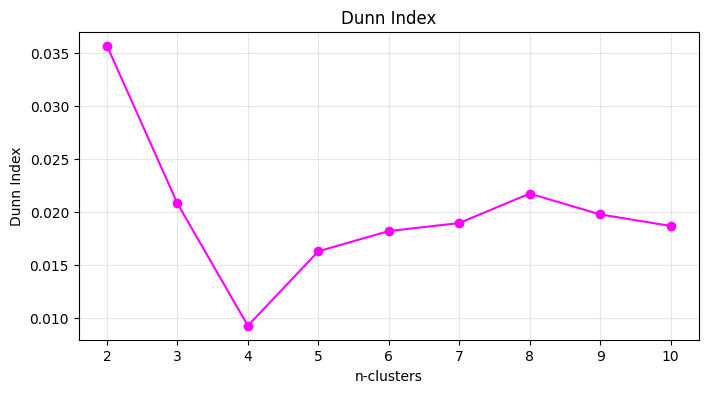

In [ ]:
dist = pairwise_distances(df_standardized)

n_max_cluster = 10
ldunn = []

for i in np.arange(2, n_max_cluster + 1):
    km_model_tmp = KMeans(n_clusters=i, init="random", n_init=n_max_cluster)
    km_model_tmp.fit(df_standardized)
    ldunn.append(dunn(dist, km_model_tmp.labels_))

plt.figure(figsize=(8, 4))
plt.plot(np.arange(2, n_max_cluster + 1), ldunn, "o-", color="magenta")
plt.xticks(np.arange(2, n_max_cluster + 1))
plt.grid(alpha=0.3)
plt.ylabel("Dunn Index")
plt.xlabel("n-clusters")
plt.title("Dunn Index");

### Validación interna con índice Davies Bouldin (Min)

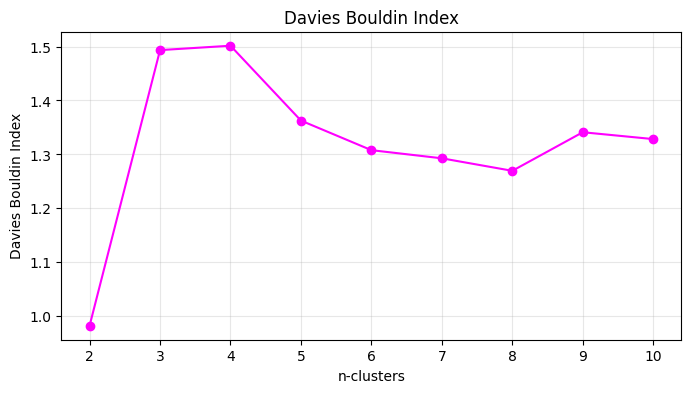

In [ ]:
n_max_cluster = 10
ldb = []

for i in np.arange(2, n_max_cluster + 1):
    km_model_tmp = KMeans(n_clusters=i, init="random", n_init=n_max_cluster)
    km_model_tmp.fit(df_standardized)
    ldb.append(davies_bouldin_score(df_standardized, km_model_tmp.labels_))

plt.figure(figsize=(8, 4))
plt.plot(np.arange(2, n_max_cluster + 1), ldb, "o-", color="magenta")
plt.xticks(np.arange(2, n_max_cluster + 1))
plt.grid(alpha=0.3)
plt.ylabel("Davies Bouldin Index")
plt.xlabel("n-clusters")
plt.title("Davies Bouldin Index");

### Válidación interna para Índice de Silhouette (max)

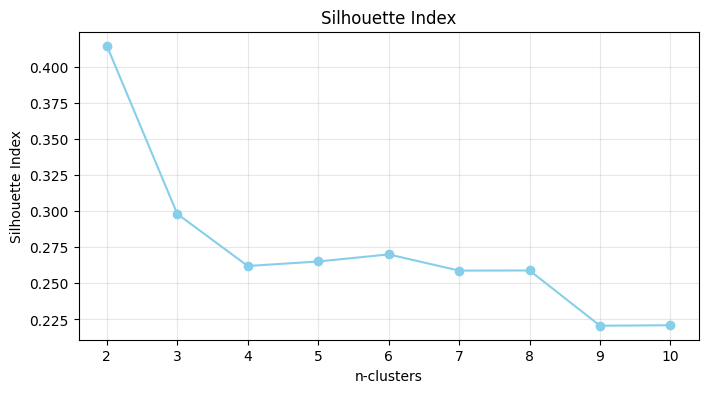

In [ ]:
n_max_cluster = 10
lsh = []

for i in np.arange(2, n_max_cluster + 1):
    km_model_tmp = KMeans(n_clusters=i, init="random", n_init=n_max_cluster)
    km_model_tmp.fit(df_standardized)
    lsh.append(silhouette_score(df_standardized, km_model_tmp.labels_))

plt.figure(figsize=(8, 4))
plt.plot(np.arange(2, n_max_cluster + 1), lsh, "o-", color="skyblue")
plt.xticks(np.arange(2, n_max_cluster + 1))
plt.grid(alpha=0.3)
plt.ylabel("Silhouette Index")
plt.xlabel("n-clusters")
plt.title("Silhouette Index");

### Análisis de los Índices de Clustering

#### Método del Codo
El gráfico sugiere que el número óptimo de clusters podría ser 3, donde la curva comienza a doblarse.

#### Índice Dunn
El índice más alto se encuentra en 2 clusters, lo que sugiere que esta podría ser una buena elección en términos de maximizar el Índice Dunn.

#### Índice Davies Bouldin
El valor más bajo se obtiene con 2 clusters, indicando mejor calidad de clustering.

#### Índice de Silhouette
El valor más alto se obtiene con 2 clusters, indicando la mejor separación de los clusters.

### Conclusión

Optaremos por usar 2 clusters como una opción inicial y evaluar los resultados. Si los 2 clusters no ofrecen una segmentación clara o útil, se probará con 3 clusters como alternativa.

### Entrenamiento modelo de Clustering KMeans (2 clusters)

In [ ]:
# Entrenamiento usando KMeans con 2 clusters
km_model = KMeans(n_clusters=2, n_init=10, random_state=42)
km_model.fit(df_standardized)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
# Obtener las etiquetas de los clusters
labels = km_model.labels_

labels

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
# Agregar las etiquetas a un DataFrame para visualización
df_with_clusters = df_standardized.copy()
df_with_clusters["Cluster"] = labels

pivot_table_mean = df_with_clusters.pivot_table(
    values=df_with_clusters.columns[:-1], index="Cluster", aggfunc="mean"
)


pivot_table_mean

,Age,Income,NumStorePurchases,NumWebPurchases,Wines
Cluster,,,,,
0,0.220221,0.846068,0.811353,0.716377,0.829993
1,-0.199803,-0.767624,-0.736128,-0.649958,-0.753040


In [ ]:
df_result = df.copy()
df_result["predicted"] = labels

pivot_table_count = pd.pivot_table(
    data=df_result,
    index="Education",  # Agrupar por el tipo de educación
    columns="predicted",  # Columnas para cada cluster
    aggfunc="size",  # Contar el número de ocurrencias
    fill_value=0,
)

# Renombrar los índices de la tabla pivote usando el diccionario de mapeo
pivot_table_count.rename(index=education_mapping, inplace=True)

pivot_table_count

predicted,0,1
Education,,
Undergraduate,79,166
Graduate,497,525
Postgraduate,383,366


### Plot de coordinadas paralelas

In [ ]:
# Se usa para dibujar el plot de coordenadas paralelas
def plot_parallel(df_standardized, labels, title, cmap="viridis"):
    df_result = df_standardized.copy()
    df_result["Cluster"] = labels

    # Plot
    plt.figure(figsize=(10, 4), dpi=100)
    parallel_coordinates(df_result, "Cluster", colormap=cmap)
    plt.legend(fontsize=15)

    # Lighten borders
    plt.gca().spines["top"].set_alpha(0)
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0)
    plt.gca().spines["left"].set_alpha(0.3)

    plt.title(title, fontsize=22)
    plt.grid(alpha=0.3)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


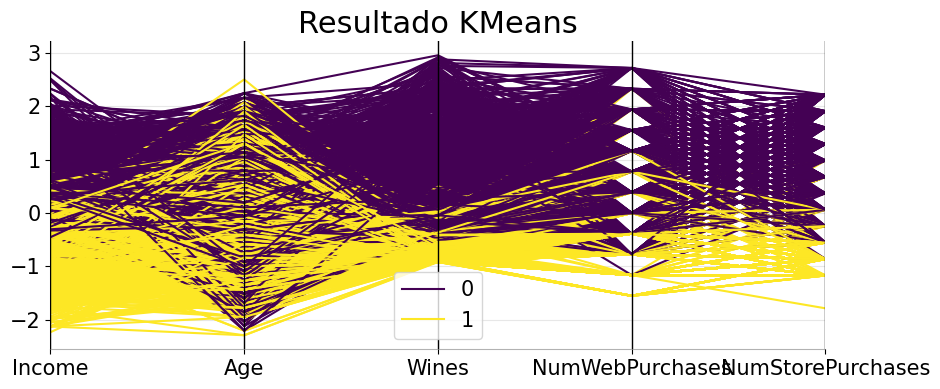

In [ ]:
plot_parallel(df_standardized, labels, "Resultado KMeans")

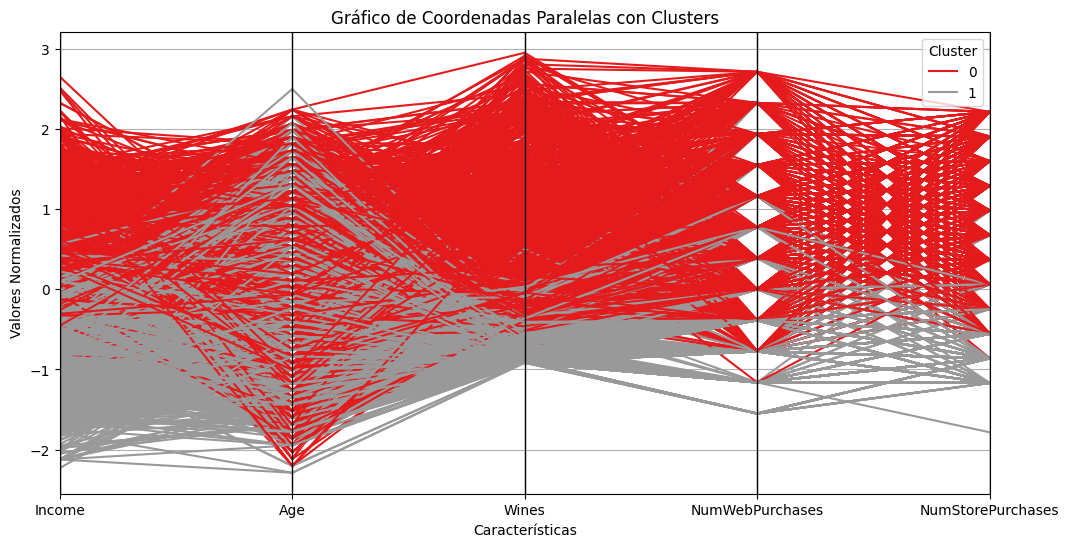

In [ ]:
# Probando otra forma de realizar el grafico
df_result = df_standardized.copy()
df_result["Cluster"] = labels

# Crear un gráfico de coordenadas paralelas
plt.figure(figsize=(12, 6))
parallel_coordinates(df_result, "Cluster", colormap=plt.get_cmap("Set1"))

# Configurar etiquetas y título
plt.title("Gráfico de Coordenadas Paralelas con Clusters")
plt.xlabel("Características")
plt.ylabel("Valores Normalizados")
plt.legend(title="Cluster")

# Mostrar el gráfico
plt.show()

## Actividad 4

### Generar Cluster jerarquícos

In [ ]:
# Lista de funciones de enlace a probar
linkage_methods = ["ward", "complete", "average", "single"]

# Diccionario para almacenar los valores de Silhouette
silhouette_scores = {}

for method in linkage_methods:
    # Crear el modelo de clustering jerárquico
    hierarchical_clustering = AgglomerativeClustering(n_clusters=2, linkage=method)

    # Ajustar el modelo
    cluster_labels = hierarchical_clustering.fit_predict(df_standardized)

    # Calcular el coeficiente de Silhouette
    silhouette_avg = silhouette_score(df_standardized, cluster_labels)
    silhouette_scores[method] = silhouette_avg
    print(f"Linkage: {method}, Silhouette Score: {silhouette_avg}")

Linkage: ward, Silhouette Score: 0.3793847221132121
Linkage: complete, Silhouette Score: 0.37257402188699523
Linkage: average, Silhouette Score: 0.33173197444012464
Linkage: single, Silhouette Score: 0.33173197444012464


In [ ]:
best_method = max(silhouette_scores, key=silhouette_scores.get)
print(
    f"Mejor función de enlace: {best_method}, con un Silhouette Score de: {silhouette_scores[best_method]}"
)

Mejor función de enlace: ward, con un Silhouette Score de: 0.3793847221132121


In [ ]:
# mdist distancia condensada
def plot_dendrogram(mdist, labels, ax, method="single", p=100, no_labels=False):

    # Se usa una matrix fija de distancias
    Z = linkage(mdist, method=method)

    # Plot dendrograma
    ax.set_xlabel("Índice de muestra")
    ax.set_ylabel("Distancia")
    ax.set_title(f"Dendrograma - Enlace: {method}")
    dendrogram(Z, labels=labels, ax=ax, truncate_mode="lastp", p=p, no_labels=no_labels);

Linkage: ward, Silhouette Score: 0.3794
Linkage: complete, Silhouette Score: 0.3726
Linkage: average, Silhouette Score: 0.3317
Linkage: single, Silhouette Score: 0.3317


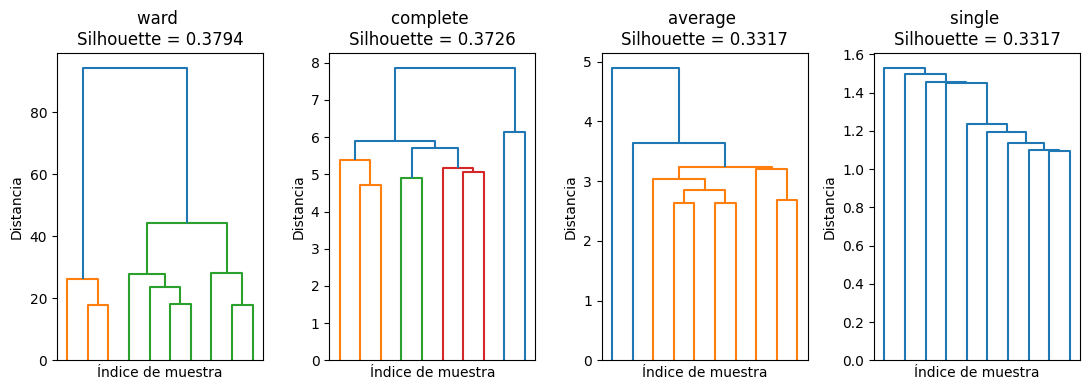

In [ ]:
# Lista de funciones de enlace a probar
linkage_methods = ["ward", "complete", "average", "single"]

_, ax = plt.subplots(1, 4, figsize=(11, 4))

mdist2 = pdist(df_standardized, metric="euclidean")
labels_obs = range(1, squareform(mdist2).shape[0] + 1)

# Diccionario para almacenar los valores de Silhouette
silhouette_scores = {}

for i, link in enumerate(linkage_methods):

    # Crear el modelo de clustering jerárquico
    if link == "ward":
        hierarchical_clustering = AgglomerativeClustering(
            n_clusters=2, linkage=link, metric="euclidean"
        )
        hierarchical_clustering.fit(df_standardized)
    else:
        hierarchical_clustering = AgglomerativeClustering(
            n_clusters=2, linkage=link, metric="precomputed"
        )
        hierarchical_clustering.fit(squareform(mdist2))

    # Calcular el coeficiente de Silhouette
    sl_score = np.round(
        silhouette_score(
            squareform(mdist2), hierarchical_clustering.labels_, metric="precomputed"
        ),
        4,
    )

    plot_dendrogram(
        mdist=mdist2, labels=None, ax=ax[i], method=link, p=10, no_labels=True
    )
    ax[i].set_title(f"{link} \nSilhouette = {sl_score}")

    silhouette_scores[link] = np.round(sl_score, 4)
    print(f"Linkage: {link}, Silhouette Score: {sl_score}")

plt.tight_layout()
plt.show()

In [ ]:
best_method = max(silhouette_scores, key=silhouette_scores.get)
print(
    f"Mejor función de enlace: {best_method}, con un Silhouette Score de: {silhouette_scores[best_method]}"
)

Mejor función de enlace: ward, con un Silhouette Score de: 0.3794


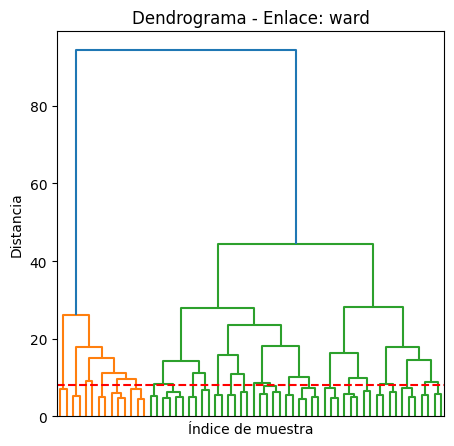

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

mdist2 = pdist(df_standardized, metric="euclidean")
plot_dendrogram(mdist=mdist2, labels=None, ax=ax, method="ward", p=60, no_labels=True)
ax.axhline(y=8, c="red", ls="--");

### Interpretación del Dendrograma

El dendrograma muestra la estructura jerárquica de los clusters y cómo se agrupan los datos a diferentes niveles de distancia.

- **Eje Y (Distancia)**: Muestra la distancia o disimilitud en la que los clusters se combinan. Cuanto más alta es la unión en el dendrograma, mayor es la disimilitud entre los clusters combinados.
- **Eje X (Índice de muestra)**: Representa las muestras individuales o los puntos de datos.
- **Colores**: Los colores (naranja y verde) indican los diferentes clusters formados a partir de la división del dendrograma.

### Visualización de los Clusters

#### Número de Clusters

- La línea roja punteada añadido indica una posible división en dos clusters. La elección de dos clusters parece apropiada dado el Silhouette Score más alto con `ward`.

#### Cluster Principal

- Dos grupos principales (naranja y verde) son claramente visibles, lo que confirma la existencia de dos clusters principales en los datos.

## Actividad 5

### Comparación entre ambos modelos basada en el índice de Silhouette

In [ ]:
# Modelo KMeans
kmeans_model = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_labels = kmeans_model.fit_predict(df_standardized)
kmeans_silhouette = silhouette_score(df_standardized, kmeans_labels)

# Modelo AgglomerativeClustering (ward)
agglo_model = AgglomerativeClustering(n_clusters=2, linkage="ward", metric="euclidean")
agglo_labels = agglo_model.fit_predict(df_standardized)
agglo_silhouette = silhouette_score(df_standardized, agglo_labels)

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative (Ward) Silhouette Score: {agglo_silhouette}")

KMeans Silhouette Score: 0.41458326346262014
Agglomerative (Ward) Silhouette Score: 0.3793847221132121


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


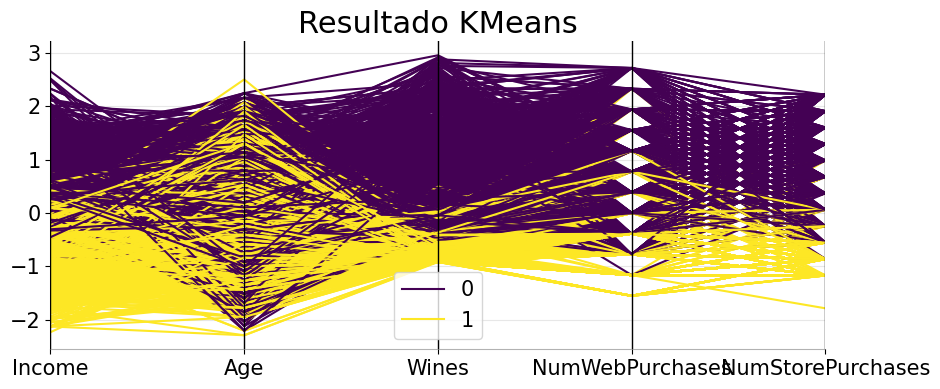

In [ ]:
plot_parallel(df_standardized, kmeans_labels, "Resultado KMeans")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


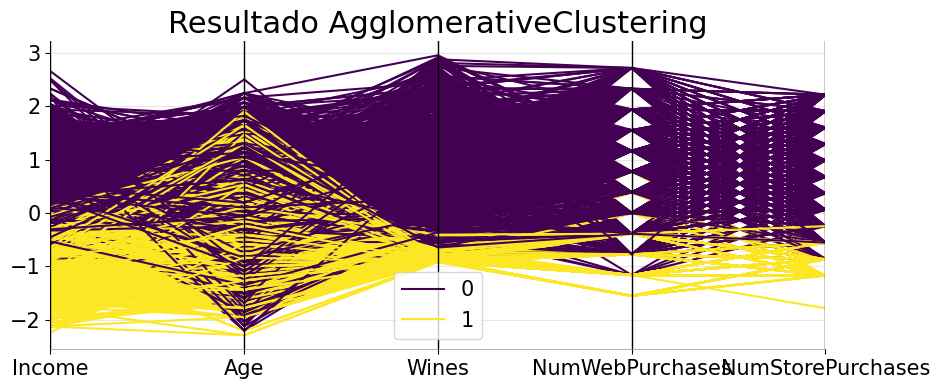

In [ ]:
plot_parallel(df_standardized, agglo_labels, "Resultado AgglomerativeClustering")

In [ ]:
# Seleccionar el mejor modelo basado en el Silhouette Score
if kmeans_silhouette > agglo_silhouette:
    best_model = "KMeans"
    best_labels = kmeans_labels
    best_silhouette = kmeans_silhouette
else:
    best_model = "Agglomerative (Ward)"
    best_labels = agglo_labels
    best_silhouette = agglo_silhouette

print(f"Mejor Modelo: {best_model} con un Silhouette Score de {best_silhouette}")

# Añadir las etiquetas del mejor modelo al DataFrame original
df["Cluster"] = best_labels

Mejor Modelo: KMeans con un Silhouette Score de 0.41458326346262014


In [ ]:
# Asignar nombres basados en las características distintivas
df["Cluster Name"] = df["Cluster"].map(
    {
        0: "Altos Ingresos y Compras Frecuentes Online",
        1: "Ingresos Moderados/Bajos y Compras en Tienda",
    }
)

# Mostrar los primeros registros del DataFrame con los nombres asignados
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Age,Spent,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner,Cluster,Cluster Name
0,1,58138.0,0,0,58,635,88,546,172,88,...,7,64,1617,0,1,0,1,0,0,Altos Ingresos y Compras Frecuentes Online
1,1,46344.0,1,1,38,11,1,6,2,1,...,5,67,27,2,3,1,1,0,1,Ingresos Moderados/Bajos y Compras en Tienda
2,1,71613.0,0,0,26,426,49,127,111,21,...,4,56,776,0,2,0,0,1,0,Altos Ingresos y Compras Frecuentes Online
3,1,26646.0,1,0,26,11,4,20,10,3,...,6,37,53,1,3,1,0,1,1,Ingresos Moderados/Bajos y Compras en Tienda
4,2,58293.0,1,0,94,173,43,118,46,27,...,5,40,422,1,3,1,0,1,1,Ingresos Moderados/Bajos y Compras en Tienda


In [ ]:
# Análisis descriptivo de los clusters
cluster_summary = df.groupby("Cluster Name").mean()
cluster_summary

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner,Cluster
Cluster Name,,,,,,,,,,,,,,,,,,,,,
Altos Ingresos y Compras Frecuentes Online,1.316997,68438.264859,0.088634,0.516163,49.094891,539.251303,48.256517,304.954119,68.687174,50.053180,...,8.442127,4.101147,54.351408,1079.672576,0.604797,2.236705,0.542231,0.368092,0.631908,0.0
Ingresos Moderados/Bajos y Compras en Tienda,1.189215,35325.577105,0.712394,0.442763,48.877010,51.057711,7.032167,30.245033,10.829707,6.523179,...,3.408704,6.319773,49.437086,124.748344,1.155156,2.811731,0.865658,0.343425,0.656575,1.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


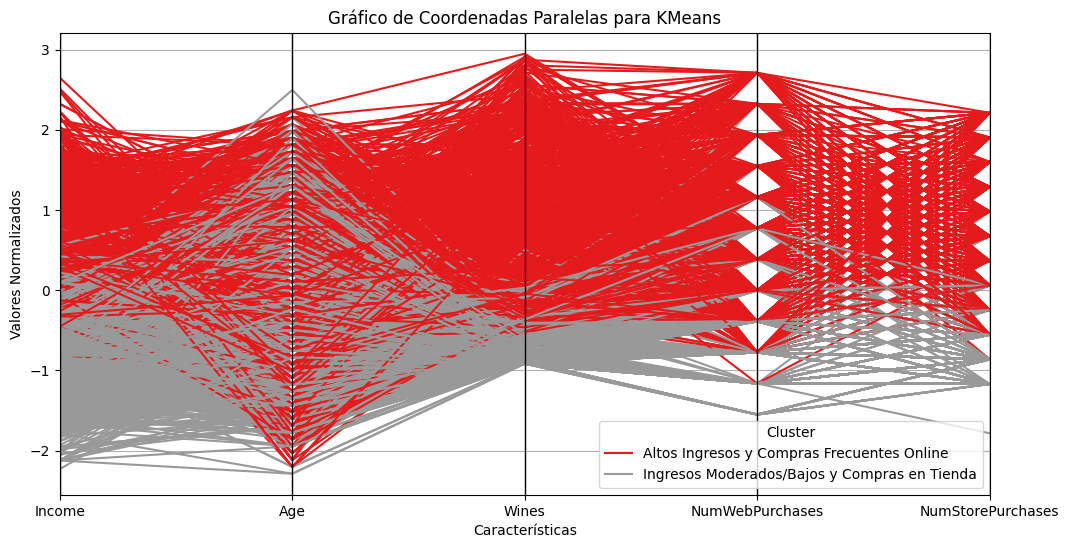

In [ ]:
df_result = df_standardized.copy()
df_result["Cluster"] = best_labels


# Asignar nombres basados en las características distintivas
df_result["Cluster Name"] = df_result["Cluster"].map(
    {
        0: "Altos Ingresos y Compras Frecuentes Online",
        1: "Ingresos Moderados/Bajos y Compras en Tienda",
    }
)

# Crear una copia del dataframe
df_result_plot = df_result.copy()

# Eliminar la columna 'Cluster' de la copia para el plot
df_result_plot.drop(columns=['Cluster'], inplace=True)

# Realizamos el plot con las etiquetas
plt.figure(figsize=(12, 6))
parallel_coordinates(df_result_plot, "Cluster Name", colormap=plt.get_cmap("Set1"))
plt.title(f"Gráfico de Coordenadas Paralelas para {best_model}")
plt.xlabel("Características")
plt.ylabel("Valores Normalizados")
plt.legend(title="Cluster")
plt.show()

In [ ]:
df_result

,Income,Age,Wines,NumWebPurchases,NumStorePurchases,Cluster,Cluster Name
0,0.344101,1.044882,1.140470,1.549501,-0.554339,0,Altos Ingresos y Compras Frecuentes Online
1,-0.230660,1.301291,-0.882932,-1.162799,-1.169221,1,Ingresos Moderados/Bajos y Compras en Tienda
2,1.000783,0.361126,0.462760,1.549501,1.290307,0,Altos Ingresos y Compras Frecuentes Online
3,-1.190609,-1.262796,-0.882932,-0.775327,-0.554339,1,Ingresos Moderados/Bajos y Compras en Tienda
4,0.351655,-1.006387,-0.357626,0.387087,0.060543,1,Ingresos Moderados/Bajos y Compras en Tienda
...,...,...,...,...,...,...,...
2011,-0.811707,-0.408100,-0.908873,-1.162799,-1.169221,1,Ingresos Moderados/Bajos y Compras en Tienda
2012,0.494444,0.190187,1.380425,1.936973,-0.554339,0,Altos Ingresos y Compras Frecuentes Online
2013,0.287717,-1.006387,2.025709,-0.775327,2.212630,0,Altos Ingresos y Compras Frecuentes Online
2014,0.885382,1.130352,0.469246,0.774558,1.290307,0,Altos Ingresos y Compras Frecuentes Online


##### El scatterplot nos ayuda a visualizar cómo las observaciones se agrupan en diferentes clústeres en función de los ingresos y las diferentes variables. Esta visualización es útil para comprender las diferencias entre los clústeres y cómo estas variables influyen en la segmentación de los datos.

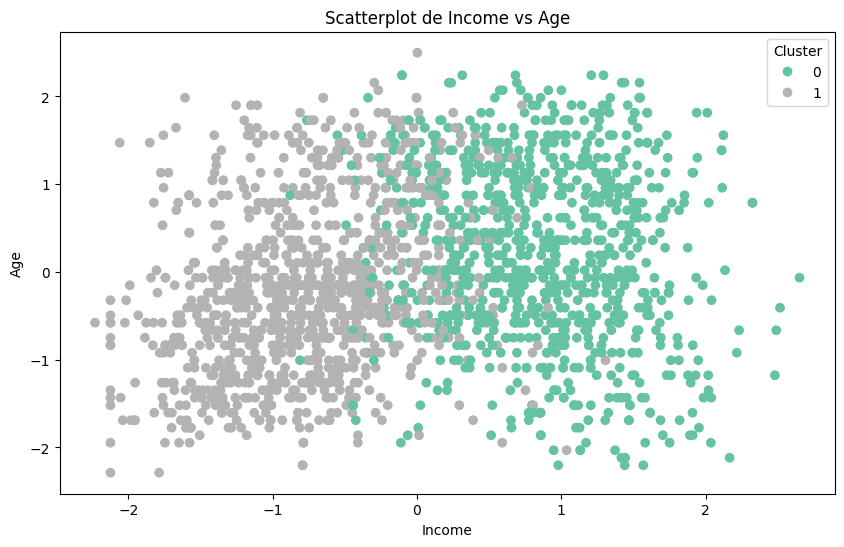

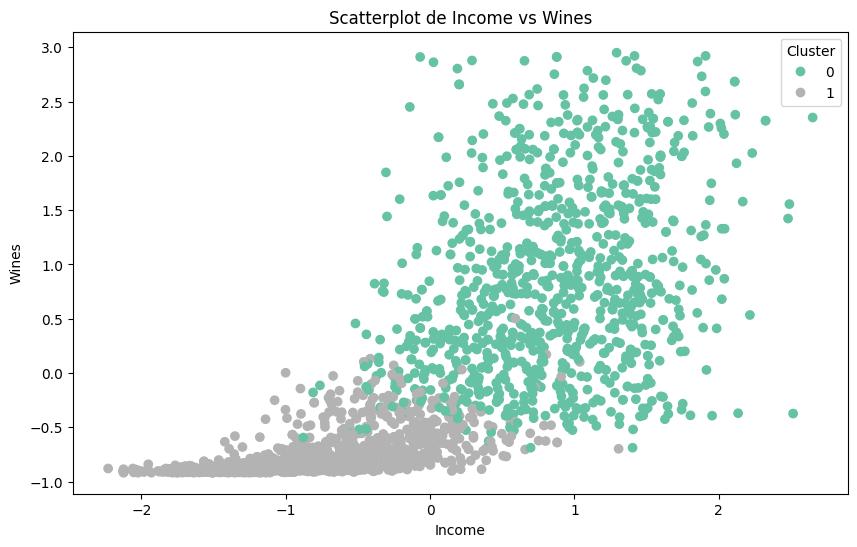

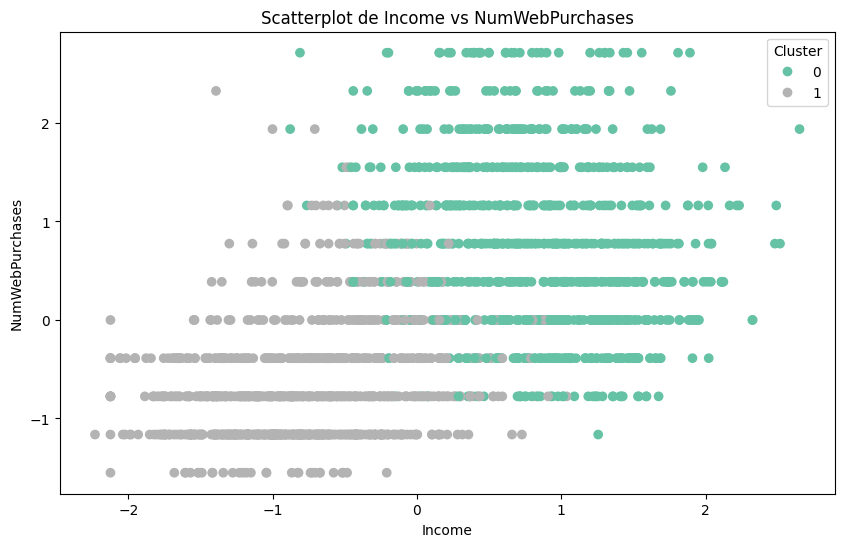

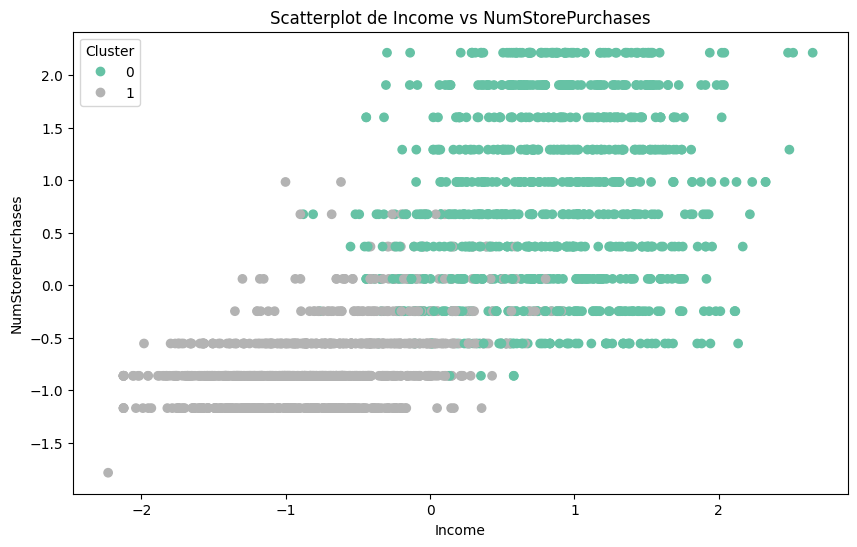

In [ ]:
# Selección de pares de características
features = df_result.columns[:-2]  # Excluyendo las columnas 'Cluster' y 'Cluster Name'

# Crear los scatterplots
for i in range(1, len(features)):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        df_result[features[0]],
        df_result[features[i]],
        c=df_result["Cluster"],
        cmap="Set2",
    )
    plt.title(f"Scatterplot de {features[0]} vs {features[i]}")
    plt.xlabel(features[0])
    plt.ylabel(features[i])
    plt.legend(*scatter.legend_elements(), title="Cluster")
    plt.show()

## Actividad 6

### Análisis y Recomendaciones de Marketing Basadas en Clusters

#### Cluster 0: "Altos Ingresos y Compradores Online"

- **Income**: Tienden a tener ingresos más altos.
- **Age**: Edad promedio más alta.
- **Wines**: Mayor consumo de vino.
- **NumWebPurchases**: Alta frecuencia de compras online.
- **NumStorePurchases**: Menor frecuencia de compras en tienda física.

##### Recomendaciones de Marketing

1. **Marketing Digital**:
    - Publicidad online en plataformas populares (redes sociales, sitios de noticias financieras).
    - Descuentos y promociones exclusivas online.

2. **Programas de Fidelización**:
    - Recompensas por compras frecuentes y de alto valor.
    - Acceso exclusivo a productos premium.

3. **Experiencia Personalizada**:
    - Recomendaciones de productos personalizadas basadas en compras anteriores.
    - Correos electrónicos con ofertas exclusivas y personalizadas.

#### Cluster 1: "Ingresos Moderados/Bajos y Compradores en Tienda"

- **Income**: Tienden a tener ingresos más bajos.
- **Age**: Edad promedio más baja.
- **Wines**: Menor consumo de vino.
- **NumWebPurchases**: Menor frecuencia de compras online.
- **NumStorePurchases**: Mayor frecuencia de compras en tienda física.

##### Recomendaciones de Marketing

1. **Promociones en Tienda**:
    - Descuentos especiales y promociones en tiendas físicas.
    - Realizar eventos y actividades en tienda para atraer a este segmento.

2. **Campañas Locales**:
    - Publicidad en radio, televisión local y medios impresos.
    - Participación en eventos comunitarios y patrocinios locales.

3. **Cupones y Ofertas**:
    - Distribución de cupones y ofertas especiales a través de folletos y periódicos locales.
    - Programas de recompensas para visitas repetidas a la tienda.